# **First Dataset**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/MOOC /Sales_Submission ')
print(df.columns)


Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')


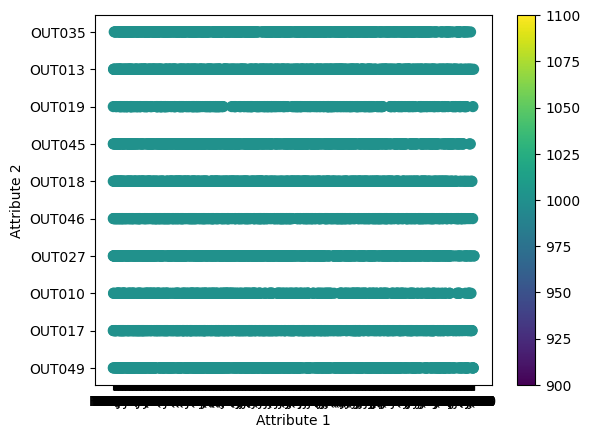

In [ ]:
import matplotlib.pyplot as plt
x = df['Item_Identifier']
y = df[ 'Outlet_Identifier']
z = df['Item_Outlet_Sales']
plt.scatter(x, y, c=z, s=50)
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.colorbar()
plt.show()

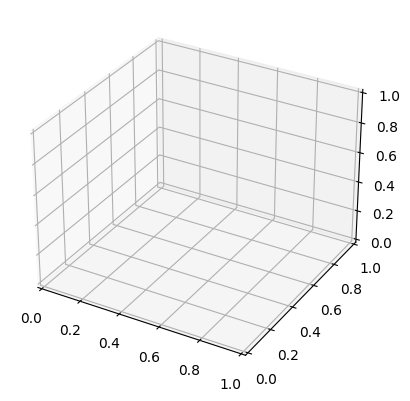

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [ ]:
# Step 2: Load and Explore Data
train_data = pd.read_csv("/content/drive/MyDrive/MOOC /Train")
test_data = pd.read_csv("/content/drive/MyDrive/MOOC /Test")
sample_submission = pd.read_csv("/content/drive/MyDrive/MOOC /Sales_Submission ")
print(train_data.columns)
print(test_data.columns)
print(sample_submission.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')


In [ ]:
# Step 3: Data Preprocessing
# a. Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [ ]:

# b. Encode categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
test_data = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [ ]:
# c. Split the training dataset into features (X) and the target variable (y)
X = train_data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = train_data['Item_Outlet_Sales']



In [ ]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Choose the Appropriate k-Value
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']


In [ ]:
# Step 6: Train the k-NN Model
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=7)

In [ ]:
# Step 7: Make Predictions
y_pred = knn_model.predict(X_test)


In [ ]:
# Step 8: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", rmse)


Root Mean Square Error: 1222.9031464109044


In [ ]:
# Step 9: Predict Sales for the Submission Data
submission_X = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
submission_X = scaler.transform(submission_X)
submission_predictions = knn_model.predict(submission_X)


In [ ]:
# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'Item_Identifier': test_data['Item_Identifier'],
                              'Outlet_Identifier': test_data['Outlet_Identifier'],
                              'Item_Outlet_Sales': submission_predictions})



In [ ]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv("Sales_Predictions.csv", index=False)
